In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_colors = pd.read_csv('colors.csv')

In [5]:
df_colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [8]:
color_unique = df_colors['name'].nunique()
print(f"There are {color_unique} unique color in our dataframe")

There are 135 unique color in our dataframe


In [12]:
number_transparent_colors = df_colors.groupby('is_trans').count()
number_transparent_colors

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [14]:
# Exploring the LEGO sets
lego_sets = pd.read_csv('sets.csv')

In [16]:
lego_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [18]:
lego_sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [19]:
# Let's find the year when the first lego set was released
lego_sets.sort_values('year').head(6)

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9526,700.1.2-1,Single 2 x 2 Brick (ABB),1950,371,1


In [20]:
# The first lego set was released in 1949

In [21]:
lego_sets[lego_sets['year']== 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [22]:
# In 1949 Lego has started selling only 5 differents products

In [23]:
# The lego set with the highest number of part
lego_sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [24]:
# The largest set that has been produced by LEGO has 9987 parts.

In [28]:
# Let's see the number of sets published by LEGo over years
sets_by_year = lego_sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [29]:
sets_by_year['set_num'].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

In [30]:
# we can see that LEGO published less than 10 different sets per year during 
# its first few years of operation(from 1949 to 1953).
# But by 2017 the company had grown spectacularly!

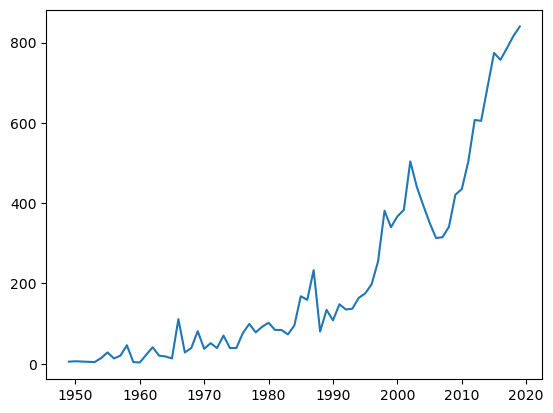

In [32]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

In [33]:
# We see that the number of sets produced by the company increased 
# dramatically in the mid-1990s 
# We also see a brief decline in the early 2000s and a 
# strong recovery around 2005 in the chart
# and since 2010 the number of set of the company increases strongly.

In [34]:
# Let's get a look into our theme dataframe
# lego_themes = pd.read_csv('themes.csv')

In [41]:
# lego_themes.head()

In [42]:
# lego_themes.isna().values.any()

In [43]:
# Number of themes per year
themes_by_year = lego_sets.groupby('year').agg({'theme_id':pd.Series.nunique})

In [45]:
themes_by_year.rename(columns = {'theme_id':'nr_themes'}, inplace=True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [ ]:
# We can notice that LEGO had only 2 themes in the first year

In [46]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


In [47]:
# By the time the number of LEGO's theme has increased strongly, and in 2020 it had 82 themes.

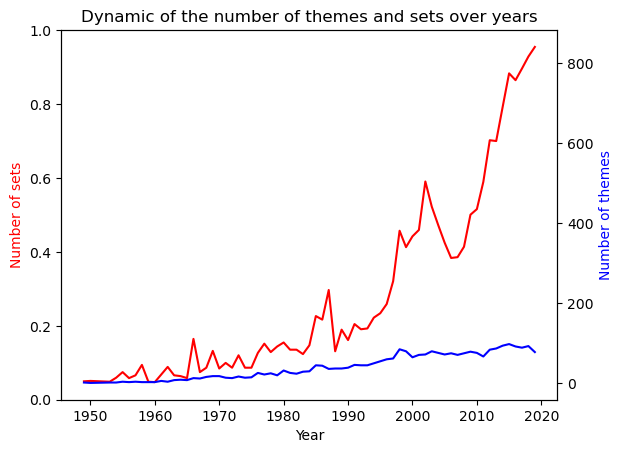

In [53]:
# We can get a bether idea in the dynamic of the development of the number of themes by 
# of LEGO compagny over years by plotting it into a line chart
# Let's create our line chart for 70 years(1949-2019)

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 


ax1.set_xlabel('Year')
ax1.set_ylabel('Number of sets', color='red')
ax2.set_ylabel('Number of themes', color='b')
plt.title("Dynamic of the number of themes and sets over years")


plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='red')
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], 'b')


In [54]:
# Avarage number of parts per lego set

In [55]:
parts_per_set = lego_sets.groupby('year').agg({'num_parts': pd.Series.mean})


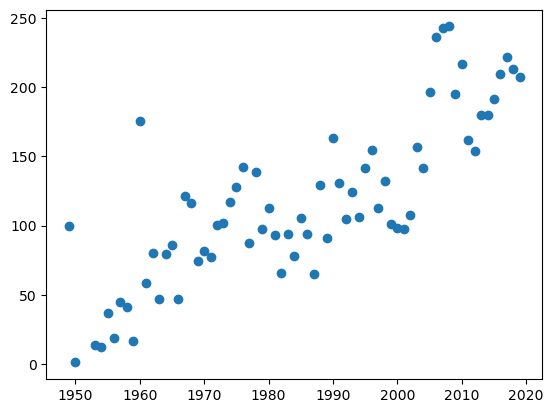

In [57]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])


In [58]:
# relation

In [59]:
set_themes_count = lego_sets["theme_id"].value_counts() 
set_themes_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [62]:
# Let's analyse the theme dataframe
lego_themes = pd.read_csv('themes.csv')

In [63]:
lego_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [65]:
lego_themes[lego_themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [66]:
# We are dealing with a relational database
# let's see which products corresponded to those themes in the lego_sets:

lego_sets[lego_sets.theme_id ==18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [67]:
# Let's mage our dataframes in other to get a bether idea under the scene
# Let's combine our data on theme names with the number sets per theme

In [68]:
set_themes_count = pd.DataFrame({'id': set_themes_count.index, 'set_count': set_themes_count.values})
set_themes_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [72]:
merged_df = pd.merge(set_themes_count, lego_themes, on='id')
merged_df[:5]


,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

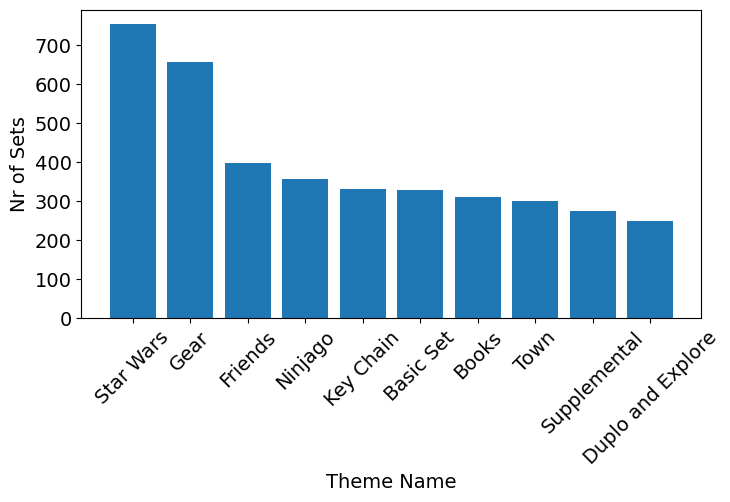

In [78]:
plt.figure(figsize=(8,4))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

In [ ]:
# Star Wars and Gear are the theme with the most LEGO sets.